In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("carprice.csv")

# Display the first 5 rows
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [7]:
# Get a summary of data types and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          199 non-null    int64  
 1   normalized-losses  199 non-null    object 
 2   make               199 non-null    object 
 3   fuel-type          199 non-null    object 
 4   aspiration         199 non-null    object 
 5   num-of-doors       199 non-null    object 
 6   body-style         199 non-null    object 
 7   drive-wheels       199 non-null    object 
 8   engine-location    199 non-null    object 
 9   wheel-base         199 non-null    float64
 10  length             199 non-null    float64
 11  width              199 non-null    float64
 12  height             199 non-null    float64
 13  curb-weight        199 non-null    int64  
 14  engine-type        199 non-null    object 
 15  num-of-cylinders   199 non-null    object 
 16  engine-size        199 non

In [8]:
# Get descriptive statistics for numerical columns
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,0.788945,98.852764,174.099497,65.905528,53.816583,2558.829146,127.949749,3.328442,3.248945,10.171960,104.150754,5107.788945,25.412060,30.904523
std,1.220895,6.085940,12.489391,2.176300,2.395002,528.005482,41.534670,0.274602,0.311583,4.027676,40.051827,467.587982,6.523544,6.900880
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.000000,52.000000,2142.500000,98.000000,3.150000,3.110000,8.500000,70.000000,4800.000000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.400000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,25.000000,30.000000
75%,2.000000,102.400000,183.500000,66.900000,55.550000,2953.000000,145.500000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,36.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000


In [9]:
# Convert 'price' column to numeric, replacing non-numeric values with NaN
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Drop rows where 'price' is now NaN (missing)
df.dropna(subset=['price'], inplace=True)

# Verify the data type has changed
print(df['price'].dtype)

float64


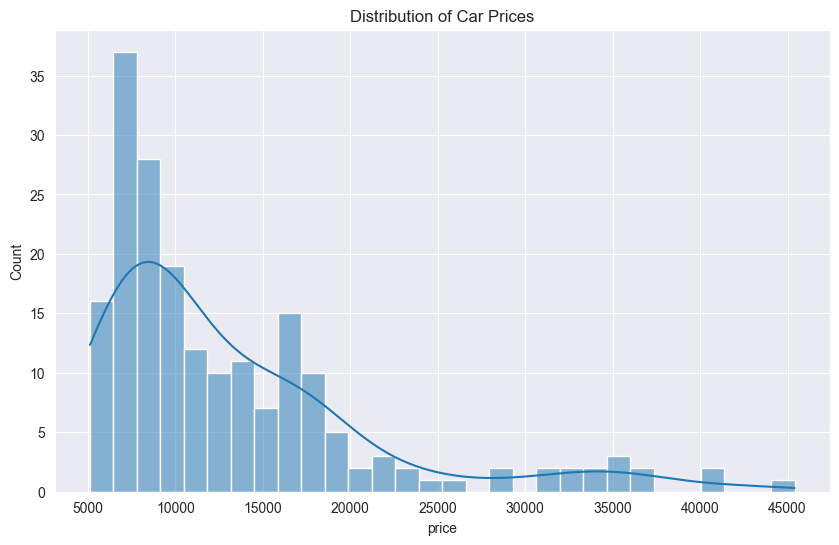

In [10]:
# Plot the distribution of the cleaned 'price' column
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, bins=30)
plt.title('Distribution of Car Prices')
plt.show()

In [11]:
# Drop columns that we won't use for the model
df_to_process = df.drop(columns=['make']) # We drop 'make' because it will be one-hot encoded

# Apply One-Hot Encoding to all remaining categorical columns
df_processed = pd.get_dummies(df_to_process, drop_first=True)

# Display the first 5 rows of the fully processed data
df_processed.head()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,...,num-of-cylinders_four,num-of-cylinders_six,num-of-cylinders_three,num-of-cylinders_twelve,fuel-system_2bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,True,False,False,False,False,False,False,True,False,False
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,True,False,False,False,False,False,False,True,False,False
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,False,True,False,False,False,False,False,True,False,False
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,True,False,False,False,False,False,False,True,False,False
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,False,False,False,False,False,False,False,True,False,False


In [12]:
# X contains all the features (all columns except 'price')
X = df_processed.drop('price', axis=1)

# y contains only our target variable (the 'price' column)
y = df_processed['price']

In [13]:
from sklearn.model_selection import train_test_split

# Split the data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
from sklearn.linear_model import LinearRegression

# 1. HERE WE CREATE the 'model' variable
model = LinearRegression()

# 2. HERE WE TRAIN the model
model.fit(X_train, y_train)

print("Model trained successfully!")

Model trained successfully!


In [15]:
# Use the trained model to predict prices on the test data
y_pred = model.predict(X_test)

In [16]:
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error (MAE): 2831.03
R² Score: 0.86


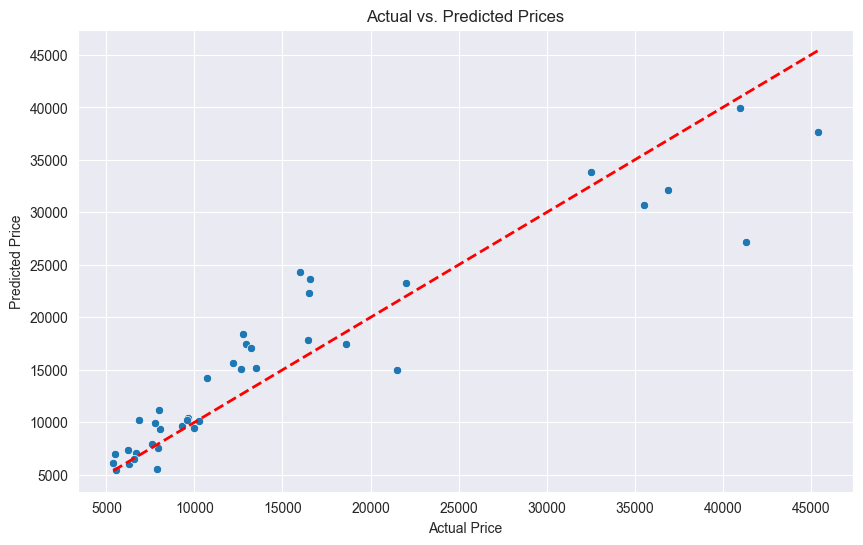

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted Prices")
plt.show()

In [19]:
import joblib

# Save the trained model to a file
joblib.dump(model, 'car_price_model.pkl')

# We also need to save the column names that the model was trained on
model_columns = X.columns
joblib.dump(model_columns, 'model_columns.pkl')

['model_columns.pkl']

In [20]:
print(df.columns)


Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')
